# The GDP Race: India’s Zooming Past the USA Like a Cheetah on a Scooter 

<div style="text-align: center">
<img src='animals.png' alt='' style="height:400px;width:500px; margin:0 auto;" />
</div>

### **Hypothesis**
 
We aim to project a timeframe for when India's GDP might surpass that of the USA, based on the following factors:
 
1. **Youth Median Age Advantage**: India’s lower median age provides a demographic dividend, boosting workforce growth.
2. **Maintained Fertility Rate**: A steady decline in India’s fertility rate supports a larger, economically active population.
3. **GDP Growth Trends**: India's consistently higher GDP growth rate compared to the USA accelerates its economic expansion.
4. **Women's Education and Empowerment**: Increased women’s education enhances workforce productivity, innovation, and economic growth.

<div style="text-align: center">
<img src='kungfu.jpg' alt='' style="height:400px;width:700px; margin:0 auto;" />
</div>

In [140]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import seaborn as sns
from scipy.stats import gamma, boxcox
from scipy import stats

### folder access path setup

In [141]:
ds_path = os.getcwd().removesuffix('notebook\\eda')+'datasets\\'
artifacts_path = os.getcwd().removesuffix('notebook\\eda')+'artifacts\\'
os.makedirs(artifacts_path, exist_ok=True)
we_path = ds_path + 'we.csv'
age_path = ds_path + 'age.csv'
fr_path = ds_path + 'fr.csv'
gdp_path = ds_path + 'gdp.csv'

### Dataset Loading

In [142]:
we, fr, gdp, age = pd.read_csv(we_path), pd.read_csv(fr_path), pd.read_csv(gdp_path), pd.read_csv(age_path)

## Data preprocessing

column renaming for faster access

In [143]:
we.rename(columns={'Combined - average years of education for 15-64 years female youth and adults':'we_avg_yr'},inplace=True)
fr.rename(columns={'Fertility rate - Sex: all - Age: all - Variant: estimates':'fr'},inplace=True)
gdp.rename(columns={'GDP, PPP (constant 2017 international $)':'gdp_ppp'},inplace=True)
age.rename(columns={'Median age - Sex: all - Age: all - Variant: estimates':'median_age'},inplace=True)

### Determining the approporate Year Range to pick the data

In [144]:
year_min, year_max = max(we['Year'].min(),fr['Year'].min(),gdp['Year'].min(),age['Year'].min()), min(we['Year'].max(),fr['Year'].max(),gdp['Year'].max(),age['Year'].max())

In [145]:
year_min, year_max

(np.int64(1990), np.int64(2022))

In [146]:
countries = ['United States', 'India', 'Germany']
all_years = { i for i in range(year_min, year_max+1)}

### Women Education Dataset Missing Years

In [147]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(we[we['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### Fertility Rate Dataset Missing Years

In [148]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(fr[fr['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### GDP Missing Years

In [149]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(gdp[gdp['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### Filtering DFs wrt. countries

In [150]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(age[age['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### Filtering records for defined countries and years

In [151]:
filtered_we = we[we['Entity'].isin(countries) & we['Year'].isin(all_years)]
filtered_fr = fr[fr['Entity'].isin(countries) & fr['Year'].isin(all_years)]
filtered_gdp = gdp[gdp['Entity'].isin(countries) & gdp['Year'].isin(all_years)]
filtered_age = age[age['Entity'].isin(countries) & age['Year'].isin(all_years)]

In [152]:
filtered_we = filtered_we[['Entity','Year','we_avg_yr']]
filtered_fr = filtered_fr[['Entity','Year','fr']]
filtered_gdp = filtered_gdp[['Entity','Year','gdp_ppp']]
filtered_age = filtered_age[['Entity','Year','median_age']]

In [153]:
filtered_gdp['gdp_ppp']=filtered_gdp['gdp_ppp']/1_000_000_000

### Join 3 Dataframes on Entity, Year and merge them as one

In [154]:
tmp_df1 = pd.merge(filtered_we, filtered_fr, how='outer', on=['Entity','Year'])
tmp_df2 = pd.merge(tmp_df1, filtered_gdp, how='outer', on=['Entity', 'Year'])
tmp_df3 = pd.merge(tmp_df2, filtered_age, how='outer', on=['Entity', 'Year'])

In [155]:
merged_df = tmp_df3.filter(items=['Entity','Year','we_avg_yr','fr','median_age','gdp_ppp'])

## Exploratory Data Analysis

### Change in average educational years (Female) over time

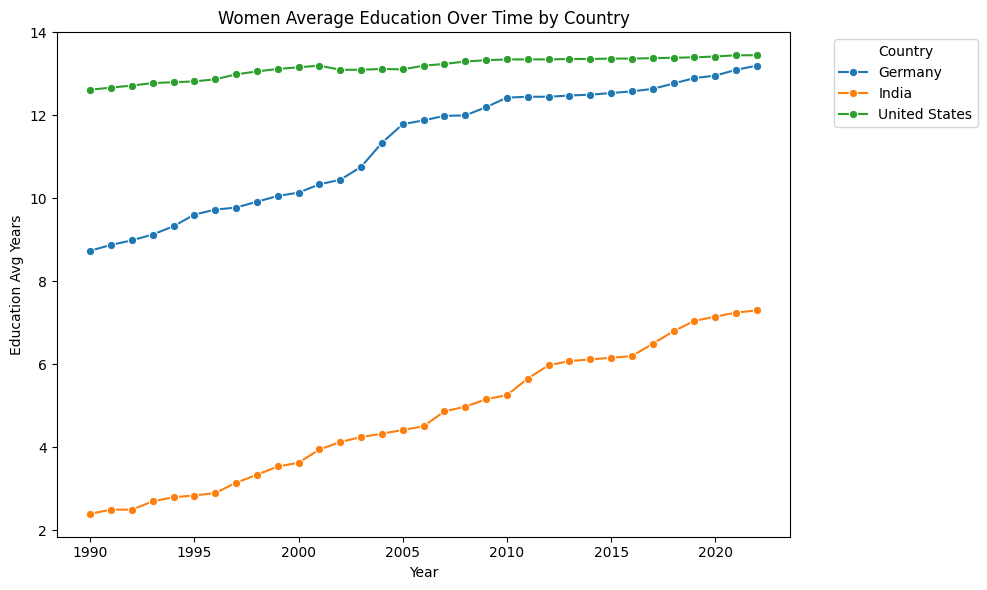

In [156]:
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(filtered_we, x='Year', y='we_avg_yr', hue='Entity', marker='o')

# Title and labels
plt.title('Women Average Education Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Education Avg Years')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Change in fertility rate over time

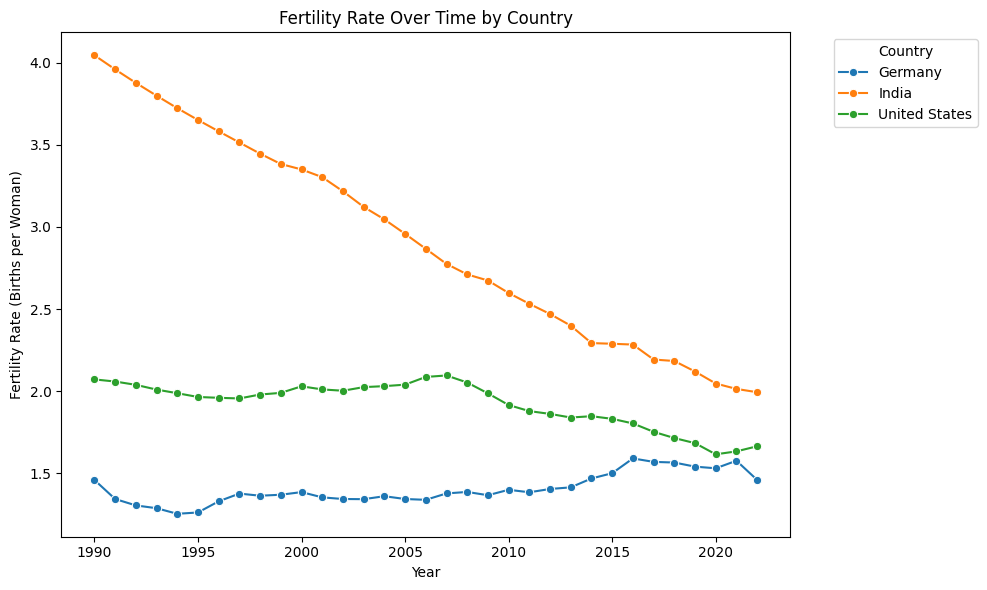

In [157]:
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(filtered_fr, x='Year', y='fr', hue='Entity', marker='o')

# Title and labels
plt.title('Fertility Rate Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Fertility Rate (Births per Woman)')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Change in GDP - PPP over time

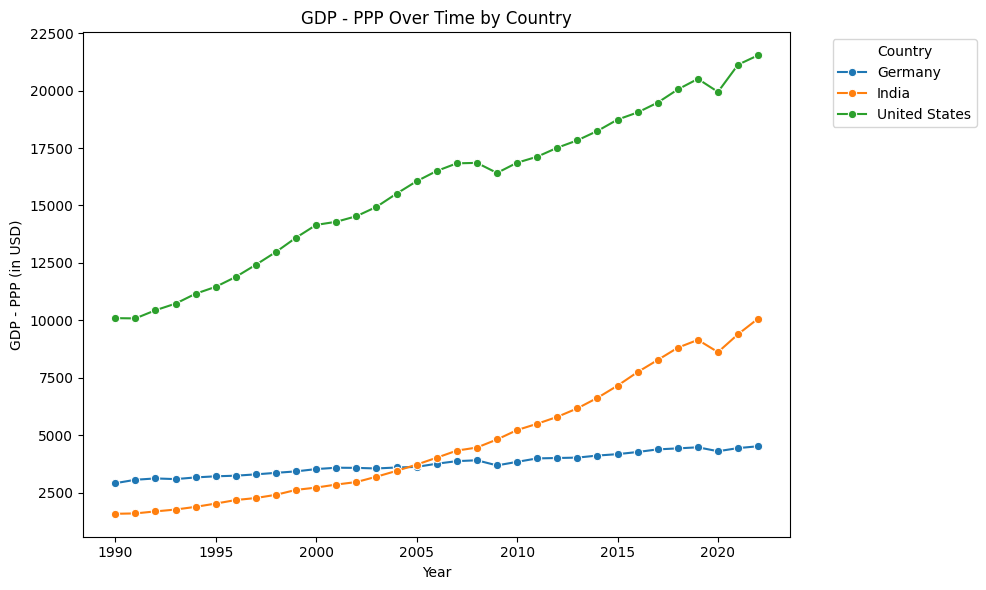

In [158]:
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(filtered_gdp, x='Year', y='gdp_ppp', hue='Entity', marker='o')

# Title and labels
plt.title('GDP - PPP Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP - PPP (in USD)')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Change in Youth median age over time

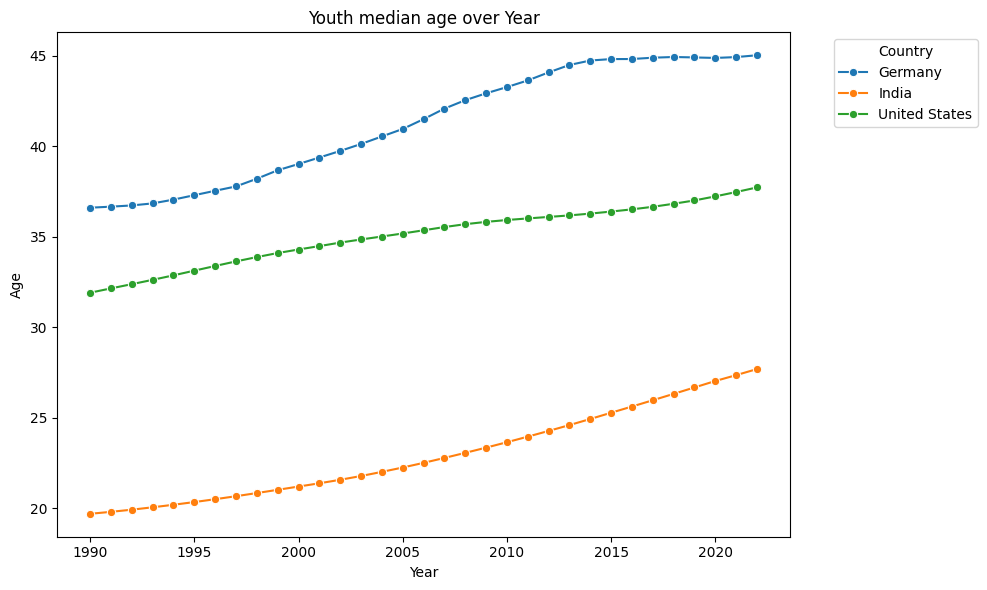

In [159]:
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(filtered_age, x='Year', y='median_age', hue='Entity', marker='o')

# Title and labels
plt.title('Youth median age over Year')
plt.xlabel('Year')
plt.ylabel('Age')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [160]:
# print(merged_df.to_string())

In [161]:
merged_df.to_csv(artifacts_path+'eco-1990-2022.csv',index=False)

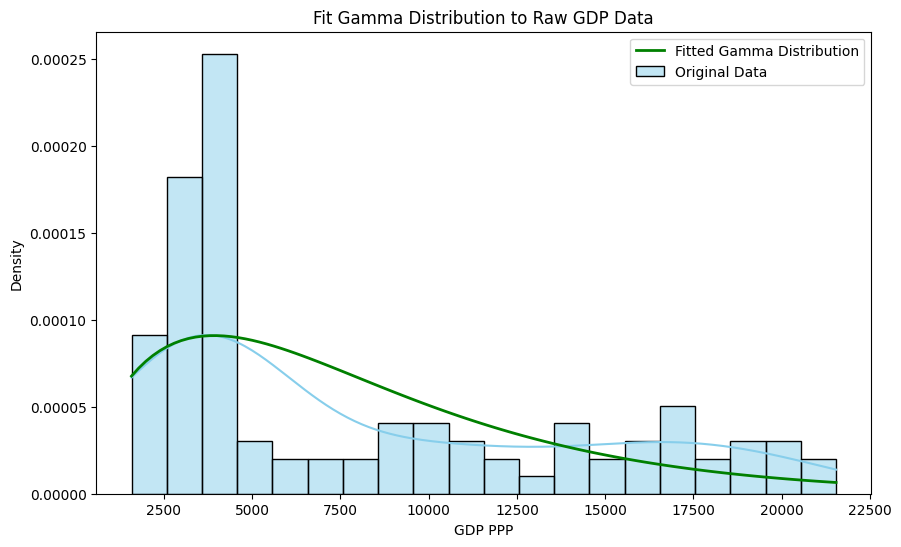

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma

gdp_data = merged_df['gdp_ppp']

# Fit the Gamma distribution to the raw GDP data (without log transformation)
shape, loc, scale = gamma.fit(gdp_data, floc=0)  # Fix location at 0 for fitting

# Plot the histogram of original data and the fitted Gamma distribution
plt.figure(figsize=(10, 6))

# Plot histogram of original GDP data
sns.histplot(gdp_data, kde=True, color='skyblue', bins=20, stat='density', label='Original Data')

# Plot the PDF of the fitted Gamma distribution
x = np.linspace(gdp_data.min(), gdp_data.max(), 100)
pdf_fitted = gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf_fitted, color='green', label='Fitted Gamma Distribution', linewidth=2)

# Title and labels
plt.title('Fit Gamma Distribution to Raw GDP Data')
plt.xlabel('GDP PPP')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


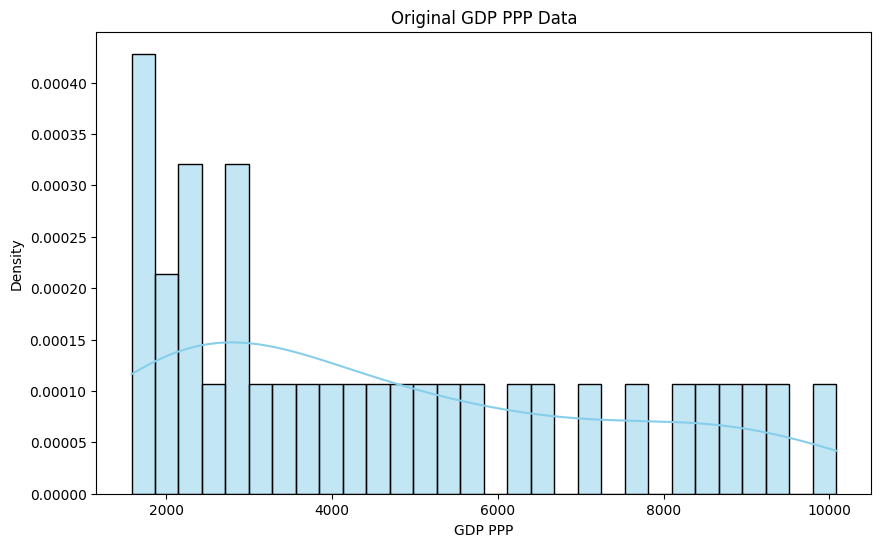

Skewness of original data: 0.6018703300237841
Box-Cox transformation lambda: 0.0018757396148707081


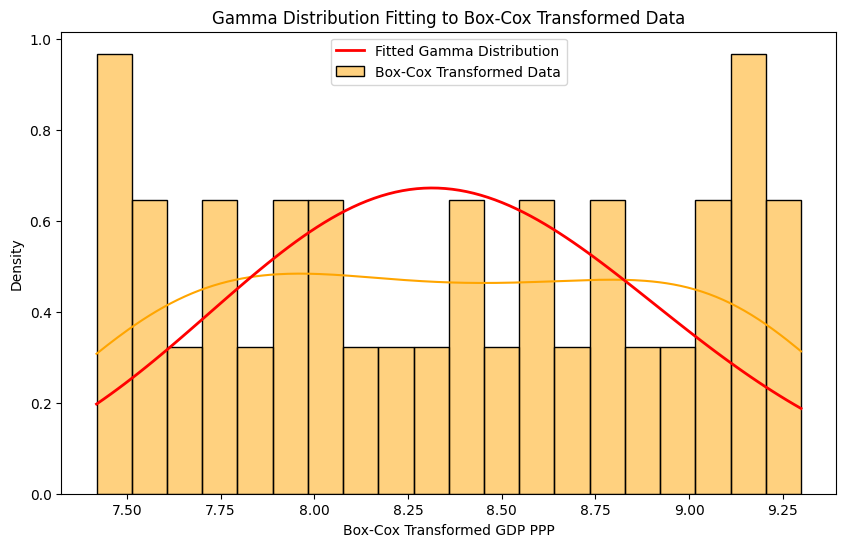

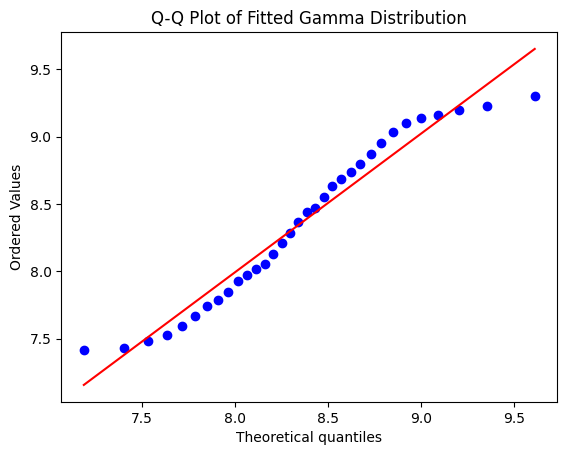

In [163]:
gdp_data = merged_df[merged_df['Entity'] == 'India']['gdp_ppp']

plt.figure(figsize=(10, 6))
sns.histplot(gdp_data, kde=True, color='skyblue', bins=30, stat='density')
plt.title('Original GDP PPP Data')
plt.xlabel('GDP PPP')
plt.ylabel('Density')
plt.show()

print(f"Skewness of original data: {gdp_data.skew()}")

# Box-Cox transformation (data > 0)
gdp_data_boxcox, lambda_value = boxcox(gdp_data + 1)  # Adding 1 to avoid log(0)
print(f"Box-Cox transformation lambda: {lambda_value}")

# Fit Gamma distribution to Box-Cox transformed data
shape, loc, scale = gamma.fit(gdp_data_boxcox, floc=0)

# Generate the PDF for the fitted Gamma distribution
x = np.linspace(min(gdp_data_boxcox), max(gdp_data_boxcox), 100)
pdf_fitted = gamma.pdf(x, shape, loc, scale)

# Plot the histogram of the transformed data and the fitted Gamma distribution
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data_boxcox, kde=True, color='orange', bins=20, stat='density', label='Box-Cox Transformed Data')
plt.plot(x, pdf_fitted, color='red', label='Fitted Gamma Distribution', linewidth=2)
plt.title('Gamma Distribution Fitting to Box-Cox Transformed Data')
plt.xlabel('Box-Cox Transformed GDP PPP')
plt.ylabel('Density')
plt.legend()
plt.show()

# 6. Check for goodness of fit (e.g., using Q-Q plot)
stats.probplot(gdp_data_boxcox, dist="gamma", sparams=(shape, loc, scale), plot=plt)
plt.title('Q-Q Plot of Fitted Gamma Distribution')
plt.show()



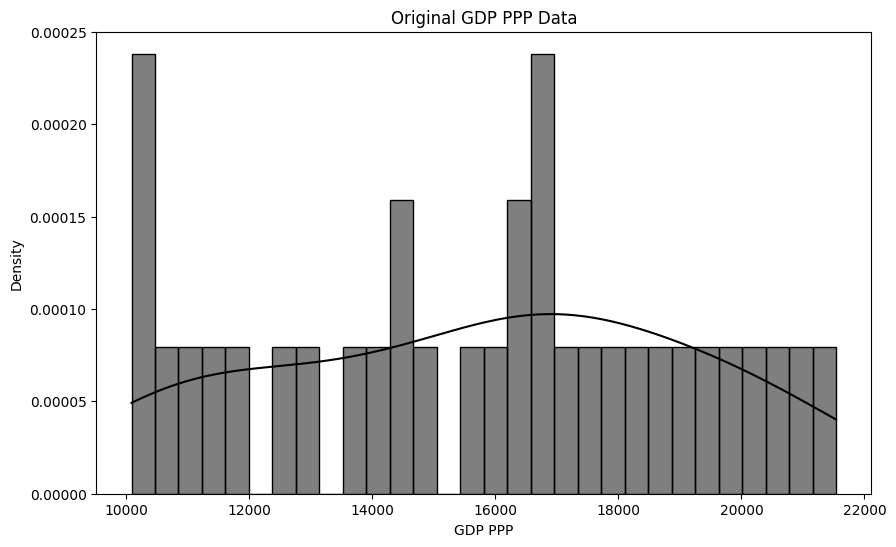

Skewness of original data: -0.13167043590154706
Box-Cox transformation lambda: 1.1047053904062325


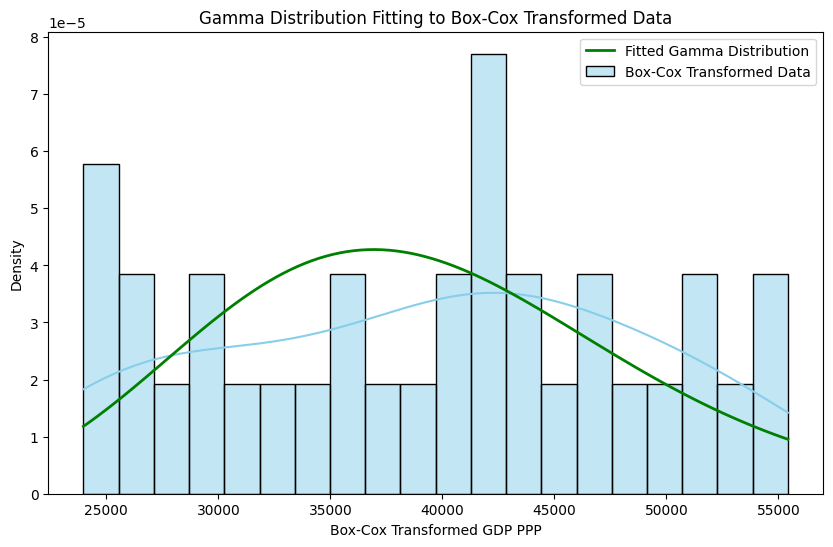

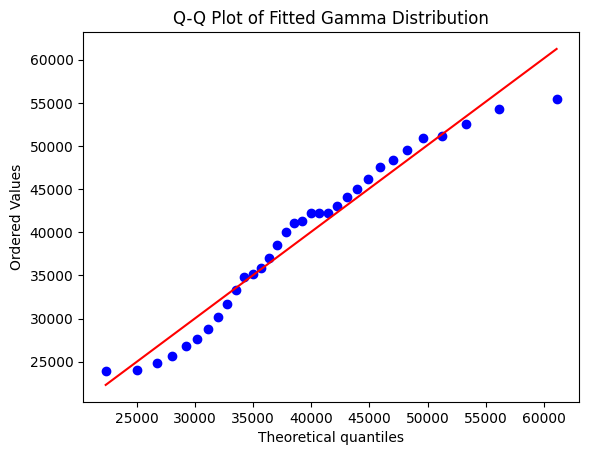

In [164]:
gdp_data = merged_df[merged_df['Entity'] == 'United States']['gdp_ppp']
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data, kde=True, color='black',bins=30, stat='density')
plt.title('Original GDP PPP Data')
plt.xlabel('GDP PPP')
plt.ylabel('Density')
plt.show()
print(f"Skewness of original data: {gdp_data.skew()}")
gdp_data_boxcox, lambda_value = boxcox(gdp_data + 1)  # Adding 1 to avoid log(0)
print(f"Box-Cox transformation lambda: {lambda_value}")
shape, loc, scale = gamma.fit(gdp_data_boxcox, floc=0)
x = np.linspace(min(gdp_data_boxcox), max(gdp_data_boxcox), 100)
pdf_fitted = gamma.pdf(x, shape, loc, scale)
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data_boxcox, kde=True, color='skyblue', bins=20, stat='density', label='Box-Cox Transformed Data')
plt.plot(x, pdf_fitted, color='green', label='Fitted Gamma Distribution', linewidth=2)
plt.title('Gamma Distribution Fitting to Box-Cox Transformed Data')
plt.xlabel('Box-Cox Transformed GDP PPP')
plt.ylabel('Density')
plt.legend()
plt.show()
stats.probplot(gdp_data_boxcox, dist="gamma", sparams=(shape, loc, scale), plot=plt)
plt.title('Q-Q Plot of Fitted Gamma Distribution')
plt.show()

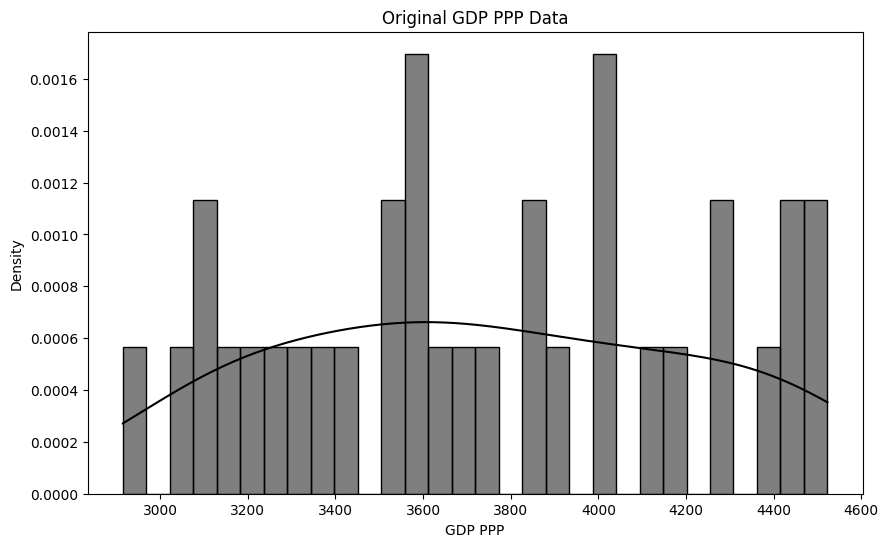

Skewness of original data: 0.06079984256513803
Box-Cox transformation lambda: 0.4989744927697372


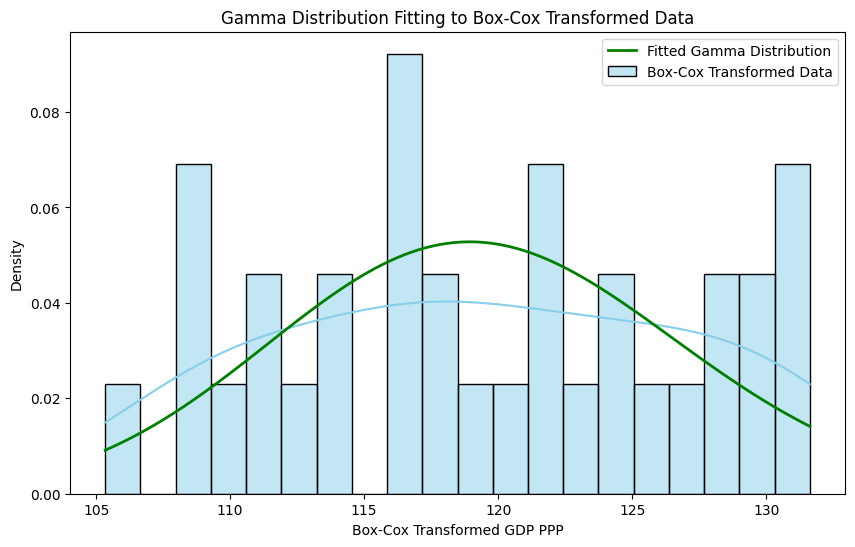

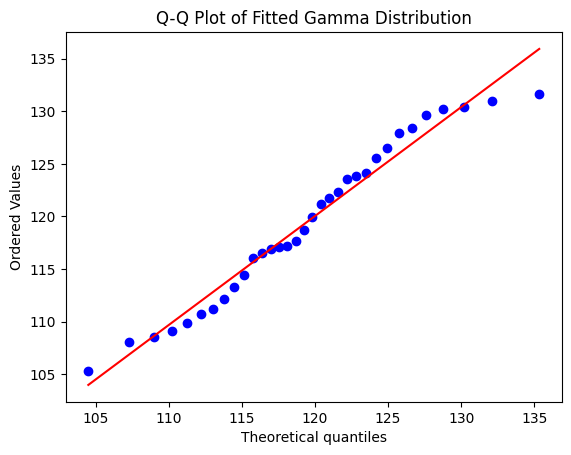

In [165]:
gdp_data = merged_df[merged_df['Entity'] == 'Germany']['gdp_ppp']
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data, kde=True, color='black',bins=30, stat='density')
plt.title('Original GDP PPP Data')
plt.xlabel('GDP PPP')
plt.ylabel('Density')
plt.show()
print(f"Skewness of original data: {gdp_data.skew()}")
gdp_data_boxcox, lambda_value = boxcox(gdp_data + 1)  # Adding 1 to avoid log(0)
print(f"Box-Cox transformation lambda: {lambda_value}")
shape, loc, scale = gamma.fit(gdp_data_boxcox, floc=0)
x = np.linspace(min(gdp_data_boxcox), max(gdp_data_boxcox), 100)
pdf_fitted = gamma.pdf(x, shape, loc, scale)
plt.figure(figsize=(10, 6))
sns.histplot(gdp_data_boxcox, kde=True, color='skyblue', bins=20, stat='density', label='Box-Cox Transformed Data')
plt.plot(x, pdf_fitted, color='green', label='Fitted Gamma Distribution', linewidth=2)
plt.title('Gamma Distribution Fitting to Box-Cox Transformed Data')
plt.xlabel('Box-Cox Transformed GDP PPP')
plt.ylabel('Density')
plt.legend()
plt.show()
stats.probplot(gdp_data_boxcox, dist="gamma", sparams=(shape, loc, scale), plot=plt)
plt.title('Q-Q Plot of Fitted Gamma Distribution')
plt.show()

# Additional Exploratory Data Analysis

### Women education and fertility rate trend

In [166]:
fact1 = pd.read_csv(artifacts_path +  'eco-1990-2022.csv')

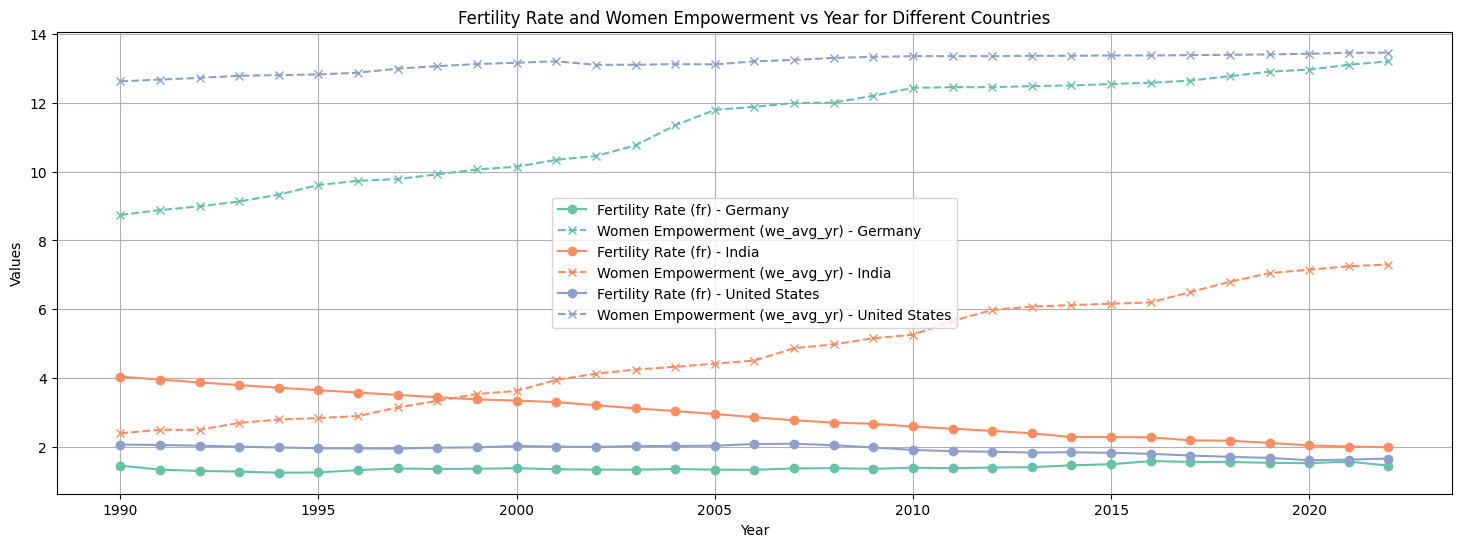

In [167]:
plt.figure(figsize=(18, 6))

# Get a list of unique countries (Entities)
countries = fact1['Entity'].unique()

# Define a color palette for different countries
palette = sns.color_palette("Set2", len(countries))

# Loop through each country and plot its 'fr' and 'we_avg_yr' against 'Year'
for i, country in enumerate(countries):
    country_data = fact1[fact1['Entity'] == country]
    
    # Plot Fertility Rate (fr) vs Year for each country with circle marker
    plt.plot(country_data['Year'], country_data['fr'], label=f'Fertility Rate (fr) - {country}', 
             color=palette[i], marker='o', linestyle='-', markersize=6)
    
    # Plot Women Empowerment (we_avg_yr) vs Year for each country with x marker
    plt.plot(country_data['Year'], country_data['we_avg_yr'], label=f'Women Empowerment (we_avg_yr) - {country}', 
             color=palette[i], marker='x', linestyle='--', markersize=6)

# Add title and labels
plt.title('Fertility Rate and Women Empowerment vs Year for Different Countries')
plt.xlabel('Year')
plt.ylabel('Values')

plt.legend()
plt.grid(True)
plt.show()

<Figure size 1800x600 with 0 Axes>

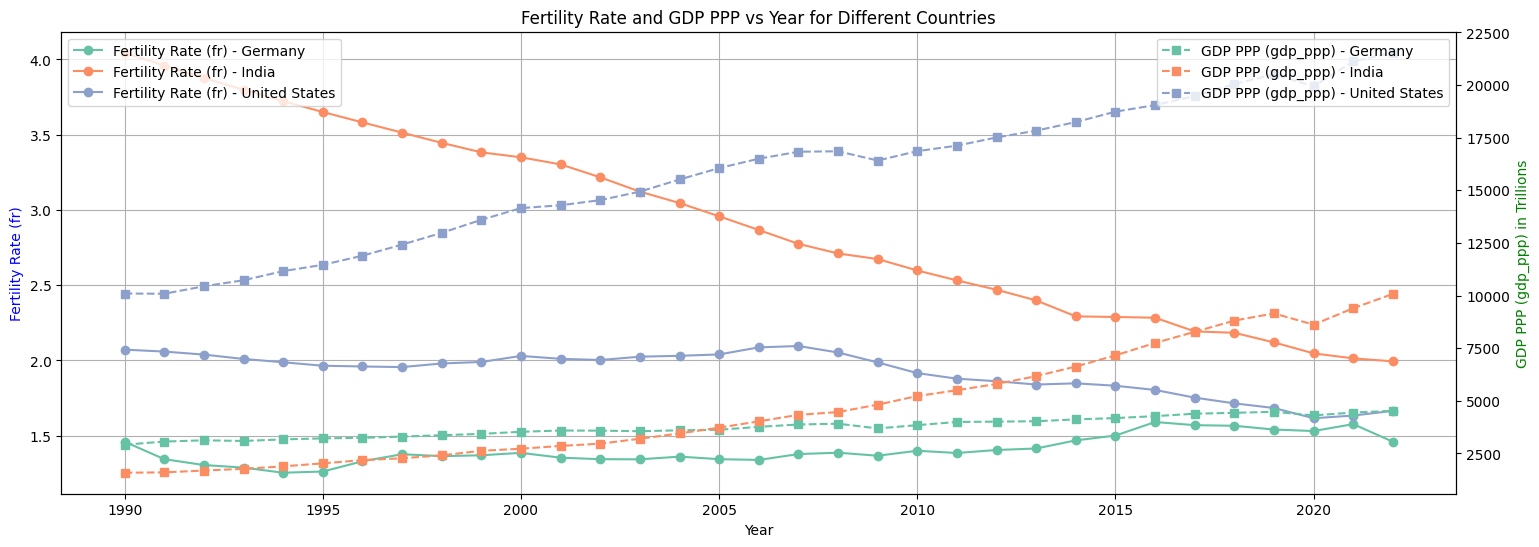

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Entity' (country) to plot individual countries
plt.figure(figsize=(18, 6))

# Get a list of unique countries (Entities)
countries = fact1['Entity'].unique()

# Define a color palette for different countries
palette = sns.color_palette("Set2", len(countries))

# Create a figure and two axes for twin y-axes
fig, ax1 = plt.subplots(figsize=(18, 6))

# Loop through each country and plot its data
for i, country in enumerate(countries):
    country_data = fact1[fact1['Entity'] == country]
    
    # Plot Fertility Rate (fr) on the first y-axis
    ax1.plot(country_data['Year'], country_data['fr'], label=f'Fertility Rate (fr) - {country}', 
             color=palette[i], marker='o', linestyle='-', markersize=6)
    
# Create a second y-axis for GDP PPP (gdp_ppp)
ax2 = ax1.twinx()

for i, country in enumerate(countries):
    country_data = fact1[fact1['Entity'] == country]
    
    # Plot GDP PPP (gdp_ppp) on the second y-axis
    ax2.plot(country_data['Year'], country_data['gdp_ppp'], label=f'GDP PPP (gdp_ppp) - {country}', 
             color=palette[i], marker='s', linestyle='--', markersize=6)

ax1.set_title('Fertility Rate and GDP PPP vs Year for Different Countries')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fertility Rate (fr)', color='blue')
ax2.set_ylabel('GDP PPP (gdp_ppp) in Trillions', color='green')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()


<Figure size 1800x600 with 0 Axes>

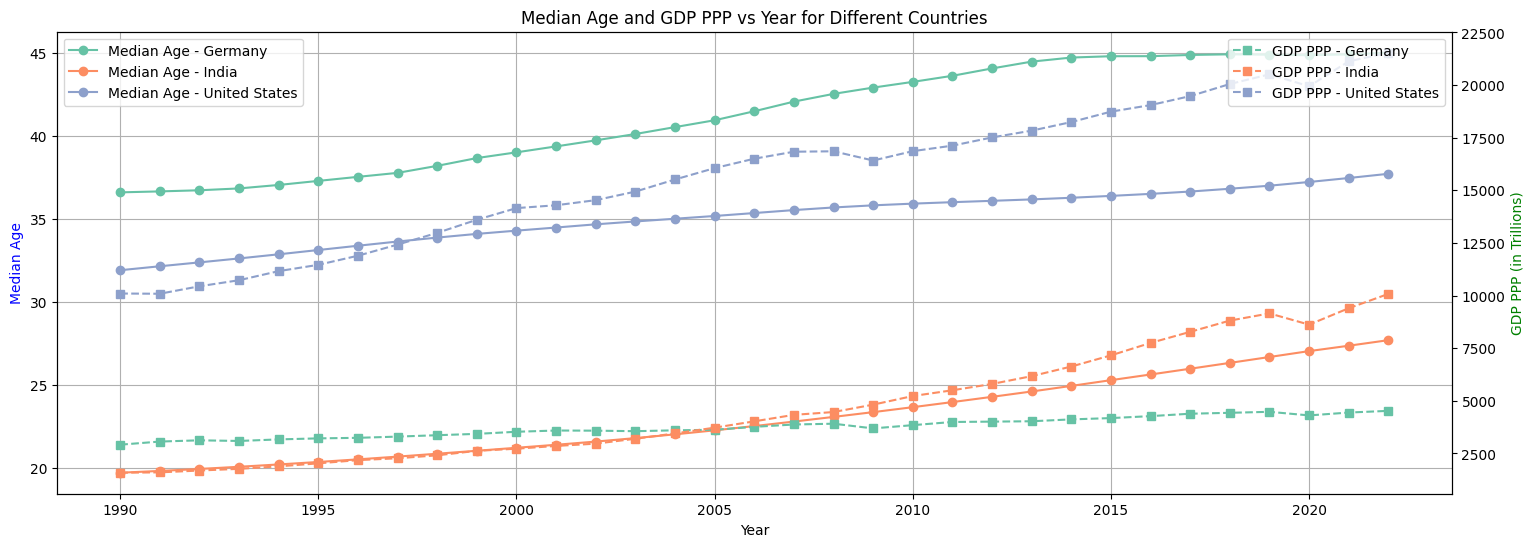

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group by 'Entity' (country) to plot individual countries
plt.figure(figsize=(18, 6))
countries = fact1['Entity'].unique()
palette = sns.color_palette("Set2", len(countries))

# Create a figure and two axes for twin y-axes
fig, ax1 = plt.subplots(figsize=(18, 6))

# Loop through each country and plot its data
for i, country in enumerate(countries):
    country_data = fact1[fact1['Entity'] == country]
    
    ax1.plot(country_data['Year'], country_data['median_age'], label=f'Median Age - {country}', 
             color=palette[i], marker='o', linestyle='-', markersize=6)
    
ax2 = ax1.twinx()

for i, country in enumerate(countries):
    country_data = fact1[fact1['Entity'] == country]
    
    ax2.plot(country_data['Year'], country_data['gdp_ppp'], label=f'GDP PPP - {country}', 
             color=palette[i], marker='s', linestyle='--', markersize=6)

ax1.set_title('Median Age and GDP PPP vs Year for Different Countries')
ax1.set_xlabel('Year')
ax1.set_ylabel('Median Age', color='blue')
ax2.set_ylabel('GDP PPP (in Trillions)', color='green')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()
